In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from tqdm import tqdm
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Loading the dataset
con = sqlite3.connect("/content/drive/My Drive/Colab Notebooks/Fine_Food_Review/database.sqlite")
filtered = pd.read_sql_query("select * from Reviews where Score != 3",con)
filtered.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
#Sorting the filtered dataset according to product id
filtered_sort = filtered.sort_values("ProductId", axis = 0, ascending = True)
#Removing duplicate datasets keeping only one of them
filtered = filtered_sort.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep = 'first', inplace = False)
print("Shape after dropping duplicates = ", filtered.shape)
#Dropping those rows where HelpFulnessNumerator > HelpFullnessDenominator
filtered = filtered[filtered.HelpfulnessNumerator <= filtered.HelpfulnessDenominator]
print("Shape after removing HelpFulnessNumerator > HelpFullnessDenominator rows = ",filtered.shape)

Shape after dropping duplicates =  (364173, 10)
Shape after removing HelpFulnessNumerator > HelpFullnessDenominator rows =  (364171, 10)


In [4]:
#Changing scores as either "negative" if score<3 or "positive" if score>3
def polarity(score):
    if score < 3:
        return 0
    else:
        return 1

l = filtered['Score']
pos_neg = l.map(polarity)
filtered['Score'] = pos_neg
filtered.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [5]:
#Taking out only Text, Time and Score columns in another dataframe
df = filtered[['Text','Time','Score']]
df.shape
counts = df['Score'].value_counts()
print(counts)
print("Ratio of positive reviews:- ",counts[1]/(counts[0]+counts[1]))
print("Ratio of negative points:- ",counts[0]/(counts[0]+counts[1]))

1    307061
0     57110
Name: Score, dtype: int64
Ratio of positive reviews:-  0.843178067446337
Ratio of negative points:-  0.15682193255366297


### Text Cleaning

In [6]:
'''#Text Cleaning
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#Text cleaning
def cleantext(review):
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr," ",review)
    text = re.sub('[^a-zA-Z]',' ',text)
    return text
corpus = []
for review in tqdm(df['Text']):
    st = cleantext(review)
    st = st.lower()
    st = st.split()
    sn = SnowballStemmer('english')
    st = [sn.stem(word) for word in st if not word in set(stopwords.words('english'))]
    st = ' '.join(st)
    corpus.append(st)'''

'#Text Cleaning\nimport string\nimport re\nimport nltk\nnltk.download(\'stopwords\')\nfrom nltk.corpus import stopwords\nfrom nltk.stem import SnowballStemmer\n#Text cleaning\ndef cleantext(review):\n    cleanr = re.compile(\'<.*?>\')\n    text = re.sub(cleanr," ",review)\n    text = re.sub(\'[^a-zA-Z]\',\' \',text)\n    return text\ncorpus = []\nfor review in tqdm(df[\'Text\']):\n    st = cleantext(review)\n    st = st.lower()\n    st = st.split()\n    sn = SnowballStemmer(\'english\')\n    st = [sn.stem(word) for word in st if not word in set(stopwords.words(\'english\'))]\n    st = \' \'.join(st)\n    corpus.append(st)'

In [7]:
'''df['Text'] = corpus
#Sorting the values according to time for time based splitting
df = df.sort_values('Time',axis=0,ascending=True)
df = df.reset_index(drop=True)
print(df[df.isnull().any(axis=1)])
df.to_csv("/content/drive/My Drive/Colab Notebooks/Fine_Food_Review/corpus.csv", index = False)'''

'df[\'Text\'] = corpus\n#Sorting the values according to time for time based splitting\ndf = df.sort_values(\'Time\',axis=0,ascending=True)\ndf = df.reset_index(drop=True)\nprint(df[df.isnull().any(axis=1)])\ndf.to_csv("/content/drive/My Drive/Colab Notebooks/Fine_Food_Review/corpus.csv", index = False)'

### Loading the already prepared corpus from drive

In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fine_Food_Review/corpus.csv")
print(df.head())

                                                Text       Time  Score
0  witti littl book make son laugh loud recit car...  939340800      1
1  grew read sendak book watch realli rosi movi i...  940809600      1
2  fun way children learn month year learn poem t...  944092800      1
3  great littl book read aloud nice rhythm well g...  944438400      1
4  book poetri month year goe month cute littl po...  946857600      1


### Taking out 60K datapoints to work on

In [3]:
df1k = df.loc[0:59999,:]
print("Shape of the new dataframe:- ",df1k.shape)
df1k['Score'].value_counts()

Shape of the new dataframe:-  (60000, 3)


1    53147
0     6853
Name: Score, dtype: int64

### Time based splitting function

In [0]:
from sklearn.model_selection import TimeSeriesSplit
def timeseries(x,y):
    ts = TimeSeriesSplit(n_splits=4)
    for train_index,test_index in ts.split(x):
        x_train,x_test = x[train_index],x[test_index]
        y_train,y_test = y[train_index],y[test_index]
    return x_train,x_test,y_train,y_test

### Splitting into train, cross validation and test data

In [0]:
x_train,x_test,y_train,y_test = timeseries(df1k['Text'].values,df1k['Score'].values)
x_train, x_cv, y_train, y_cv = timeseries(x_train,y_train)

### Impementing balanced_accuracy_score as a function
#### The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

In [0]:
def balanced_accuracy_score(cm):
  pos_recall = cm[1][1]/(cm[1][1]+cm[0][1])
  neg_recall = cm[0][0]/(cm[0][0]+cm[1][0])
  bac = (pos_recall+neg_recall)/2
  return bac

### Finding optimal K using cross validation

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
l = list(range(1,50))
k_list = list(filter(lambda x:x%2 != 0, l))
def cross_val(x_train,x_cv):
    cv_scores = []
    for k in tqdm(k_list):
        knn = KNeighborsClassifier(n_neighbors = k,metric = 'cosine')
        knn.fit(x_train,y_train)
        cv_pred = knn.predict(x_cv)
        balanced_acc = balanced_accuracy_score(confusion_matrix(y_cv,cv_pred))
        cv_scores.append(balanced_acc)
    return cv_scores

### Bag of Words implementation

  0%|          | 0/25 [00:00<?, ?it/s]


Bag of words train vector shape:-  (38400, 26445)

Bag of words CV vector shape:-  (9600, 26445)


100%|██████████| 25/25 [08:09<00:00, 19.70s/it]



Maximum balanced_accuracy_score:-  0.5011512733541701

Value of K corresponding to maximum balanced_accuracy_score:-  3


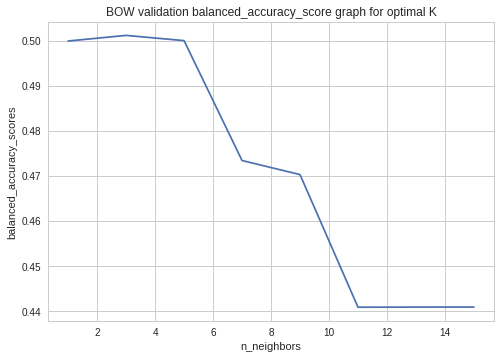

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow_train = cv.fit_transform(x_train)
bow_cv = cv.transform(x_cv)
print("\nBag of words train vector shape:- ",bow_train.shape)
print("\nBag of words CV vector shape:- ",bow_cv.shape)
#Cross valdiation for getting optimal K
cv_scores = cross_val(bow_train,bow_cv)
print("\nMaximum balanced_accuracy_score:- ",max(cv_scores))
print("\nValue of K corresponding to maximum balanced_accuracy_score:- ",k_list[cv_scores.index(max(cv_scores))])
#Plotting balanced_accuracy_scores against no. of neighbors
sns.set_style('whitegrid')
plt.plot(k_list,cv_scores)
plt.xlabel("n_neighbors")
plt.ylabel("balanced_accuracy_scores")
plt.title("BOW validation balanced_accuracy_score graph for optimal K")
plt.show()

#### The above graph is not continuing after 15 n_neighbors because balance_accuracy_score is undefined after 15 because of neg_recall. Recall of 0 class is 0/0 after 15 n_neighbors.

In [9]:
%%time
#Testing the KNN model with kd_tree algo and with optimal K
bow_test = cv.transform(x_test)
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'kd_tree', p = 1)
knn.fit(bow_train,y_train)
y_pred = knn.predict(bow_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("BOW test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("BOW Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("BOW test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("BOW test average_precision_score:- ",ap*100)

BOW test balanced_accuracy_score:-  50.8660668626497
BOW Test accuracy:-  86.725
BOW test F1 score:-  92.87726358148892
BOW test average_precision_score:-  87.63791215831091
CPU times: user 5h 55min 52s, sys: 1.65 s, total: 5h 55min 54s
Wall time: 5h 55min 55s


In [10]:
%%time
#Testing the KNN model with brute algo and with optimal K
knn = KNeighborsClassifier(n_neighbors=k_list[cv_scores.index(max(cv_scores))],algorithm = 'brute',metric='cosine')
knn.fit(bow_train,y_train)
y_pred = knn.predict(bow_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("BOW test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("BOW Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("BOW test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("BOW test average_precision_score:- ",ap*100)

BOW test balanced_accuracy_score:-  50.878932271013575
BOW Test accuracy:-  84.80833333333334
BOW test F1 score:-  91.73055114538444
BOW test average_precision_score:-  87.68273648922312
CPU times: user 20.9 s, sys: 1.18 s, total: 22.1 s
Wall time: 22.1 s


Confusion matrix:-  [[   66  1420]
 [  403 10111]]


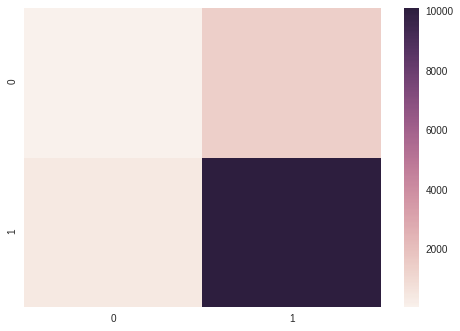

In [11]:
#Model performance metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:- ",cm)
#Plotting confusion matrix
sns.heatmap(cm)

### Tfidf implementation

  0%|          | 0/25 [00:00<?, ?it/s]


Shape of tfidf_vec_train:-  (38400, 26445)

Shape of tfidf_vec_cv:-  (9600, 26445)


100%|██████████| 25/25 [07:53<00:00, 19.28s/it]


Maximum balanced_accuracy_score:-  0.5303116231866755

Value of K corresponding to maximum balanced_accuracy_score:-  7


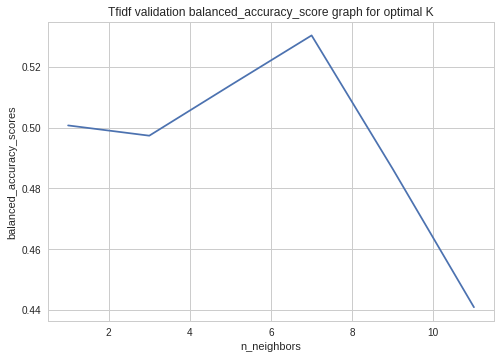

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(x_train)
tfidf_cv = tfidf.transform(x_cv)
print("\nShape of tfidf_vec_train:- ",tfidf_train.shape)
print("\nShape of tfidf_vec_cv:- ",tfidf_cv.shape)
#Cross valdiation for getting optimal K
cv_scores = cross_val(tfidf_train,tfidf_cv)
print("\nMaximum balanced_accuracy_score:- ",max(cv_scores))
print("\nValue of K corresponding to maximum balanced_accuracy_score:- ",k_list[cv_scores.index(max(cv_scores))])
#Plotting balanced_accuracy_scores against no. of neighbors
sns.set_style('whitegrid')
plt.plot(k_list,cv_scores)
plt.xlabel("n_neighbors")
plt.ylabel("balanced_accuracy_scores")
plt.title("Tfidf validation balanced_accuracy_score graph for optimal K")
plt.show()

In [19]:
%%time
#Testing the KNN model with ball_tree algo and with optimal K
tfidf_test = tfidf.transform(x_test)
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'ball_tree', p = 1)
knn.fit(tfidf_train,y_train)
y_pred = knn.predict(tfidf_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("\nTfidf test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("\nTfidf Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nTfidf test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nTfidf test average_precision_score:- ",ap*100)


Tfidf test balanced_accuracy_score:-  43.806785029590735

Tfidf Test accuracy:-  87.59166666666667

Tfidf test F1 score:-  93.38545599928925

Tfidf test average_precision_score:-  87.61357094274838
CPU times: user 6h 1min 14s, sys: 1.67 s, total: 6h 1min 16s
Wall time: 6h 1min 18s


In [20]:
%%time
#Testing the KNN model with brute algo and with optimal K
knn = KNeighborsClassifier(n_neighbors=k_list[cv_scores.index(max(cv_scores))],algorithm = 'brute',metric='cosine')
knn.fit(tfidf_train,y_train)
y_pred = knn.predict(tfidf_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("\nTfidf test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("\nTfidf Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nTfidf test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nTfidf test average_precision_score:- ",ap*100)


Tfidf test balanced_accuracy_score:-  49.068541609834654

Tfidf Test accuracy:-  87.36666666666667

Tfidf test F1 score:-  93.25502758497954

Tfidf test average_precision_score:-  87.61078650704934
CPU times: user 26.9 s, sys: 177 ms, total: 27.1 s
Wall time: 27.1 s


Confusion matrix:-  [[    4  1482]
 [   34 10480]]


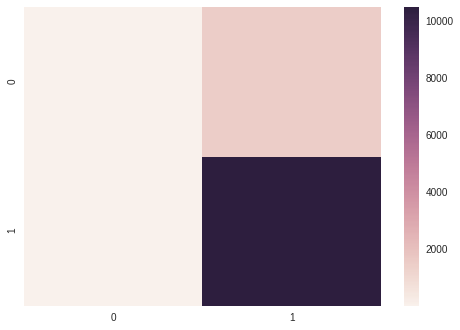

In [21]:
#Model performance metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:- ",cm)
#Plotting confusion matrix
sns.heatmap(cm)

### Word2Vec implementation

In [0]:
#Function to create list of sentences
def sent_list(x):
    list_of_sent = []
    for sent in tqdm(x):
        words = []
        for w in sent.split():
            words.append(w)
        list_of_sent.append(words)
    return list_of_sent

In [12]:
'''!pip install gensim'''

'!pip install gensim'

In [13]:
#implementing word2vec
from gensim.models import Word2Vec
sent_train = sent_list(x_train)
w2v = Word2Vec(sent_train,size=50,min_count=1,workers=4)

100%|██████████| 38400/38400 [00:00<00:00, 63454.44it/s]


### Avg Word2Vec implementation

In [0]:
#Function to create avg word2vec vector
def avgw2v(x):
    avgw2v_vec = []
    for sent in tqdm(x):
        sent_vec = np.zeros(50)
        count = 0
        for word in sent:
            try:
                vec = w2v.wv[word]
                sent_vec+=vec
                count+=1
            except:
                pass
        sent_vec/=count
        avgw2v_vec.append(sent_vec)
    return avgw2v_vec

  0%|          | 0/25 [00:00<?, ?it/s]


Shape of avgw2v_train vector:-  (38400, 50)

Shape of avgw2v_cv vector:-  (9600, 50)


100%|██████████| 25/25 [03:23<00:00,  8.16s/it]



Maximum balanced_accuracy_score:-  0.5004633366215286

Value of K corresponding to maximum balanced_accuracy_score:-  7


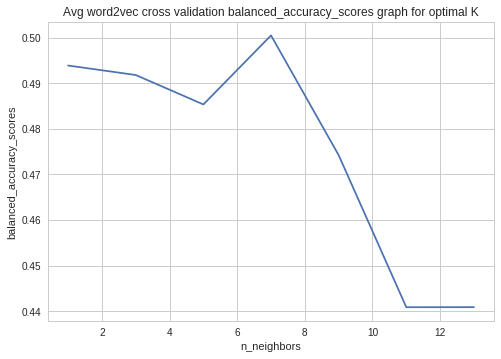

In [15]:
#Creating Avg Word2Vec of training and cross validation data
sent_cv = sent_list(x_cv)
avgw2v_train = np.array(avgw2v(sent_train))
avgw2v_cv = np.array(avgw2v(sent_cv))
print("\nShape of avgw2v_train vector:- ",avgw2v_train.shape)
print("\nShape of avgw2v_cv vector:- ",avgw2v_cv.shape)
#K-Fold cross valdiation for getting optimal K
cv_scores = cross_val(avgw2v_train,avgw2v_cv)
print("\nMaximum balanced_accuracy_score:- ",max(cv_scores))
print("\nValue of K corresponding to maximum balanced_accuracy_score:- ",k_list[cv_scores.index(max(cv_scores))])
#Plotting balanced_accuracy_scores against no. of neighbors
sns.set_style('whitegrid')
plt.plot(k_list,cv_scores)
plt.xlabel("n_neighbors")
plt.ylabel("balanced_accuracy_scores")
plt.title("Avg word2vec cross validation balanced_accuracy_scores graph for optimal K")
plt.show()

In [17]:
%%time
#Testing the KNN model with kd_tree algo and with optimal K
sent_test = sent_list(x_test)
avgw2v_test = np.array(avgw2v(sent_test))
print("\nShape of the avgw2v_test vector:- ",avgw2v_test.shape)
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'kd_tree', p = 1)
knn.fit(avgw2v_train,y_train)
y_pred = knn.predict(avgw2v_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("\nAvg word2vec test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("\nAvg word2vec Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nAvgword2vec test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nAvgword2vec test average_precision_score:- ",ap*100)

100%|██████████| 12000/12000 [00:01<00:00, 7035.41it/s]



Shape of the avgw2v_test vector:-  (12000, 50)

Avg word2vec test balanced_accuracy_score:-  52.513621054622426

Avg word2vec Test accuracy:-  87.36666666666667

Avgword2vec test F1 score:-  93.2526259569165

Avgword2vec test average_precision_score:-  87.63586811127605
CPU times: user 2min 24s, sys: 63.5 ms, total: 2min 24s
Wall time: 2min 25s


In [19]:
%%time
#Testing the KNN model with brute algo and with optimal K
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'brute', metric = 'cosine')
knn.fit(avgw2v_train,y_train)
y_pred = knn.predict(avgw2v_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("Avg word2vec test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("Avg word2vec Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nAvgword2vec test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nAvgword2vec test average_precision_score:- ",ap*100)

Avg word2vec test balanced_accuracy_score:-  53.43861862944554
Avg word2vec Test accuracy:-  87.35000000000001

Avgword2vec test F1 score:-  93.24191968658178

Avgword2vec test average_precision_score:-  87.646348981405
CPU times: user 10.7 s, sys: 1.71 s, total: 12.4 s
Wall time: 10.9 s


Confusion matrix:-  [[   10  1476]
 [   42 10472]]


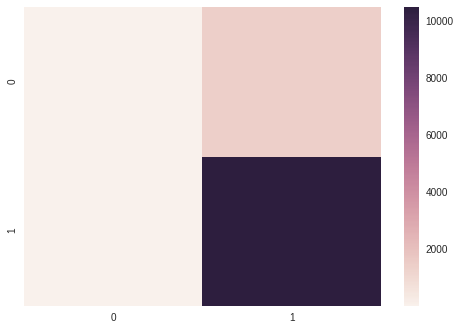

In [20]:
#Model performance metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:- ",cm)
#Plotting confusion matrix
sns.heatmap(cm)

### Tfidf weighted word2vec

In [0]:
#Function for creating tfidf weighted Word2Vec
def tfidfw2v(x):
    dictionary = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
    tfidf_w2v_vec = []
    i=0
    for sent in tqdm(x):
        sent_vec = np.zeros(50)
        weights = 0
        for word in sent:
            try:
                vec = w2v.wv[word]
                tfidf_value = dictionary[word]*sent.count(word)
                sent_vec+=(tfidf_value*vec)
                weights+=tfidf_value
            except:
                pass
        sent_vec/=weights
        tfidf_w2v_vec.append(sent_vec)
        i+=1
    return tfidf_w2v_vec

  0%|          | 0/25 [00:00<?, ?it/s]


Shape of tfidfw2v_train vector:-  (38400, 50)

Shape of tfidfw2v_cv vector:-  (9600, 50)


100%|██████████| 25/25 [03:19<00:00,  8.19s/it]


Maximum balanced_accuracy_score:-  0.5773898121901042

Value of K corresponding to maximum balanced_accuracy_score:-  9


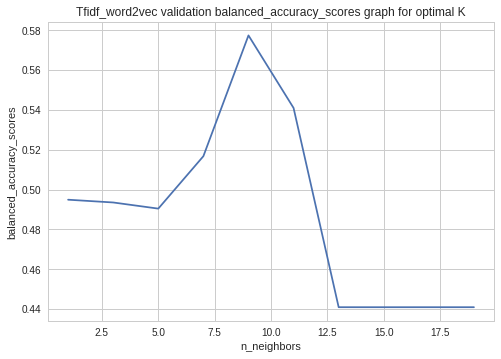

In [23]:
#Creating tfidf Word2Vec of train data and cross_validation data
tfidfw2v_train = np.array(tfidfw2v(sent_train))
tfidfw2v_cv = np.array(tfidfw2v(sent_cv))
print("\nShape of tfidfw2v_train vector:- ",tfidfw2v_train.shape)
print("\nShape of tfidfw2v_cv vector:- ",tfidfw2v_cv.shape)
#K-Fold cross valdiation for getting optimal K
cv_scores = cross_val(tfidfw2v_train,tfidfw2v_cv)
print("\nMaximum balanced_accuracy_score:- ",max(cv_scores))
print("\nValue of K corresponding to maximum balanced_accuracy_score:- ",k_list[cv_scores.index(max(cv_scores))])
#Plotting balanced_accuracy_scores against no. of neighbors
sns.set_style('whitegrid')
plt.plot(k_list,cv_scores)
plt.xlabel("n_neighbors")
plt.ylabel("balanced_accuracy_scores")
plt.title("Tfidf_word2vec validation balanced_accuracy_scores graph for optimal K")
plt.show()

In [30]:
%%time
#Testing the KNN model with kd_tree algo and with optimal K
tfidfw2v_test = np.array(tfidfw2v(sent_test))
print("\nShape of the tfidfw2v_test vector:- ",tfidfw2v_test.shape)
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'kd_tree', p = 1)
knn.fit(tfidfw2v_train,y_train)
y_pred = knn.predict(tfidfw2v_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("\nTfidf word2vec test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("\nTfidf word2vec Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nTfidfword2vec test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nTfidf word2vec test average_precision_score:- ",ap*100)

100%|██████████| 12000/12000 [00:03<00:00, 3407.65it/s]



Shape of the tfidfw2v_test vector:-  (12000, 50)

Tfidf word2vec test balanced_accuracy_score:-  56.31464798131465

Tfidf word2vec Test accuracy:-  87.56666666666668

Tfidfword2vec test F1 score:-  93.36947826859834

Tfidf word2vec test average_precision_score:-  87.62928515193272
CPU times: user 1min 58s, sys: 106 ms, total: 1min 58s
Wall time: 1min 58s


In [31]:
%%time
#Testing the KNN model with brute algo and with optimal K
knn = KNeighborsClassifier(n_neighbors = k_list[cv_scores.index(max(cv_scores))], algorithm = 'brute', p=1)
knn.fit(tfidfw2v_train,y_train)
y_pred = knn.predict(tfidfw2v_test)
bac = balanced_accuracy_score(confusion_matrix(y_test,y_pred))
print("Tfidf word2vec test balanced_accuracy_score:- ",(bac*100))
acc = accuracy_score(y_test,y_pred)
print("Tfidf word2vec Test accuracy:- ",(acc*100))
f1 = f1_score(y_test,y_pred)
print("\nTfidf word2vec test F1 score:- ",f1*100)
ap = average_precision_score(y_test,y_pred)
print("\nTfidf word2vec test average_precision_score:- ",ap*100)

Tfidf word2vec test balanced_accuracy_score:-  56.31464798131465
Tfidf word2vec Test accuracy:-  87.56666666666668

Tfidf word2vec test F1 score:-  93.36947826859834

Tfidf word2vec test average_precision_score:-  87.62928515193272
CPU times: user 36 s, sys: 60.6 ms, total: 36 s
Wall time: 36 s


Confusion matrix:-  [[    3  1483]
 [    9 10505]]


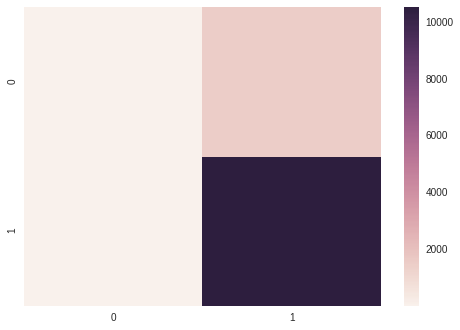

In [32]:
#Model performance metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:- ",cm)
#Plotting confusion matrix
sns.heatmap(cm)

## Results:-

| Model | Hyperparameter(K) | Accuracy |
| - | - | - | - |
| Bag of Words | 3 | 86.3 |
|Tfidf | 7 | 87.6 |
| Avg Word2Vec | 7 | 87.35 |
| Tfidf Word2Vec | 9 | 87.57 |